In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 単回帰分析

### データの仕様
data1はランダムに生成したxの値からy=4+3x+$\epsilon$($\epsilon$はノイズ)なるyを計算したデータである.

In [2]:
df = pd.read_csv("data1.csv")
df.head()

,x,y
0,1.337552,7.673493
1,1.617263,8.340384
2,0.427299,3.920846
3,1.726479,7.997781
4,0.753139,6.558939


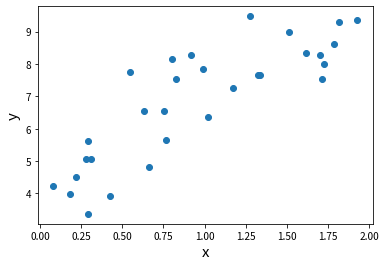

In [3]:
# データのプロット
plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.show()

### 正規方程式によるパラメータ計算

In [60]:
df["s"] = 1
X = df[["s","x"]].to_numpy()
y = df["y"].to_numpy()

In [66]:
T = np.linalg.inv(np.dot(X.T,X)) # Xの転置とXの積の逆行列を計算
np.dot(np.dot(T,X.T),y) # 先に計算した逆行列とXの転置とyの積を計算

array([4.30115189, 2.65088848])

### scikit-learnによる線形回帰

In [12]:
from sklearn.linear_model import LinearRegression

# numpy形式に変換
X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)
model = LinearRegression() # インスタンス化
model.fit(X,y) # フィッティング

LinearRegression()

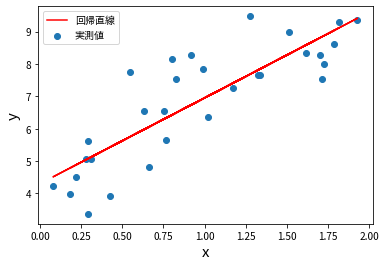

In [68]:
# 実測値と回帰直線のプロット
plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"],label="実測値")
plt.plot(df["x"],model.predict(X),c="r",label="回帰直線")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

### 性能評価

In [76]:
# 自由度調整済み決定係数
def adj_R_squared(n,k,R_squared):
    """
    Description of adj_R_squared
    
    This function calculate adjusted R-squared.
    
    Args : 
    n(int) : number of the data length
    k(int) : number of the parameter of model
    R_squared : R_squared values of the model
    
    Returns :
    adj_R_squared value(float)
    """
    return 1-(n-1)/(n-k-1)*(1-R_squared)

In [79]:
from sklearn.metrics import mean_squared_error

print("intercept : ",model.intercept_[0])
print("slope : ",model.coef_[0][0])
print("R2 score : ",model.score(X,y))
print("adj R2 score : ",adj_R_squared(X.shape[0],2,model.score(X,y)))
print("MSE : ",mean_squared_error(y,model.predict(X)))

intercept :  4.537584753061825
slope :  2.5148037342937726
R2 score :  0.7091291613061028
adj R2 score :  0.687583173254703
MSE :  0.9259403192677309


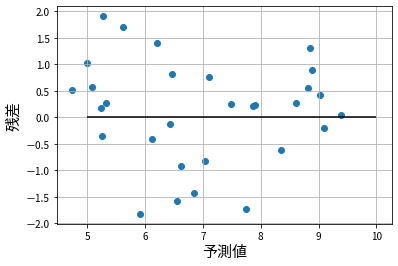

In [80]:
y_pred = model.predict(X)
resid = y_pred-y

plt.figure(facecolor="white")
plt.scatter(y_pred,resid)
plt.hlines(y = 0, xmin = 5, xmax = 10, color = 'black')
plt.xlabel("予測値",fontsize=15) # predicted value
plt.ylabel("残差",fontsize=15) # residuals
plt.grid()
plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


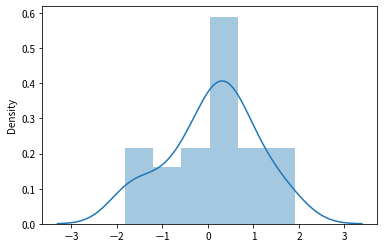

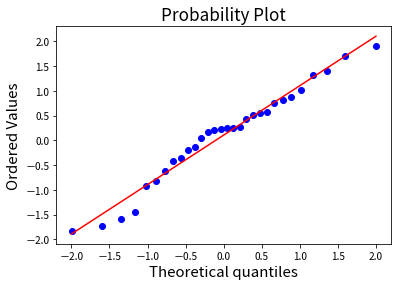

In [81]:
from scipy import stats

# カーネル密度
plt.figure(facecolor='white')
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid.reshape(1,-1)[0],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

## 重回帰分析

### データの仕様
データとしてWine Quality Data Setを用いる. 今回は赤ワインの成分に関する情報のうちdensityとvolatile acidityから, そのワインの品質quality(0～10)を予測する.

Reference : https://archive.ics.uci.edu/ml/datasets/wine+quality

In [158]:
df = pd.read_csv("data6.csv",sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [159]:
from sklearn.preprocessing import StandardScaler
# preprocessing

df["s"] = 1
X = df[["s","density","volatile acidity"]]
y = df[["quality"]]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[:,0] = 1

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

### 正規方程式によるパラメータ計算

In [161]:
T = np.linalg.inv(np.dot(X.T,X)) # Xの転置とXの積の逆行列を計算
np.dot(np.dot(T,X.T),y) # 先に計算した逆行列とXの転置とyの積を計算

array([[ 4.04168886e-15],
       [-1.66397440e-01],
       [-3.86892672e-01]])

### scikit-learnによる線形回帰

In [162]:
X = df[["density","volatile acidity"]]
y = df[["quality"]]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

In [150]:
model = LinearRegression() # インスタンス化
model.fit(X,y) # フィッティング

LinearRegression()

In [151]:
print("intercept : ",model.intercept_)
print("slope : ",model.coef_)
print("R2 score : ",model.score(X,y))
print("adj R2 score : ",adj_R_squared(X.shape[0],3,model.score(X,y)))
print("MSE : ",mean_squared_error(y,model.predict(X)))

intercept :  [4.08961201e-15]
slope :  [[-0.16639744 -0.38689267]]
R2 score :  0.18021005472982288
adj R2 score :  0.17866813006787274
MSE :  0.8197899452701772


## 多項式回帰

### データの仕様

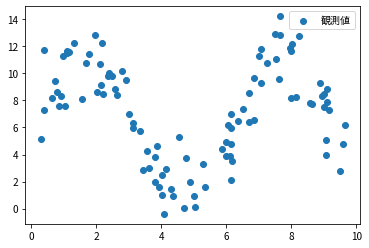

In [46]:
df = pd.read_csv("data2.csv")

plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='観測値')
plt.legend()

### scikit-learnによる線形回帰

In [47]:
from sklearn.preprocessing import PolynomialFeatures

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=4,include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)

LinearRegression()

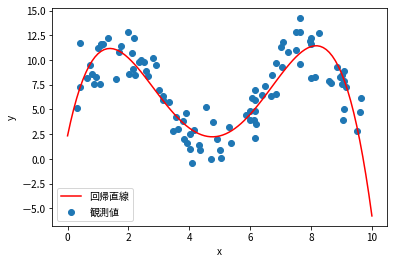

In [48]:
x_line = np.linspace(0,10,101).reshape(-1,1)
x_line_poly = poly_features.transform(x_line)
y_line = model.predict(x_line_poly)

plt.figure(facecolor="white")
plt.scatter(X,y,label="観測値")
plt.plot(x_line,y_line,color="r",label="回帰直線")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Redge回帰

### データの仕様

In [49]:
df = pd.read_csv("data3.csv")
df.head()

,x,y
0,4.337520,7.763191
1,0.201284,7.851685
2,-0.504076,7.773407
3,0.812612,9.694481
4,4.670285,7.922672


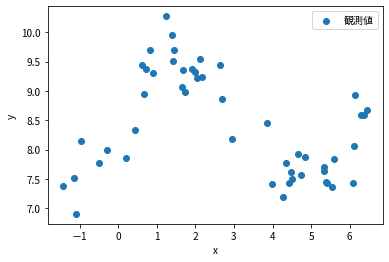

In [50]:
plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='観測値')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### scikit-learnによるRedge回帰

In [51]:
degree = 4
from sklearn.preprocessing import PolynomialFeatures 

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [52]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1,solver="cholesky") # コレスキーの行列分解テクニック
model.fit(X_poly,y)

Ridge(alpha=1, solver='cholesky')

In [53]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  8.57547440359043
傾き :  [[ 0.8949188  -0.16031769 -0.07298733  0.01201288]]
決定係数 :  0.8077718940368315


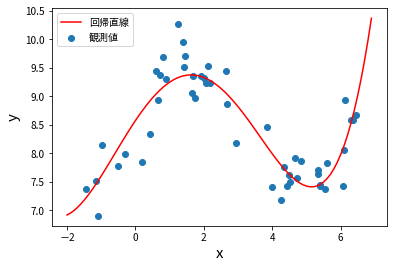

In [55]:
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = model.predict(Xpred_poly) # 予測

plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"],label="観測値")
plt.plot(Xpred,ypred,c="r",label="回帰直線")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

### ハイパーパラメータの効果

alpha :  0
切片 :  8.56597887870128
傾き :  [[ 0.93901737 -0.17501155 -0.07231767  0.01211205]]
回帰係数ベクトルのノルム :  0.9579974977405884
決定係数 :  0.8088602907393474

alpha :  1
切片 :  8.57547440359043
傾き :  [[ 0.8949188  -0.16031769 -0.07298733  0.01201288]]
回帰係数ベクトルのノルム :  0.9121693232130733
決定係数 :  0.8077718940368315

alpha :  10
切片 :  8.651852001923386
傾き :  [[ 0.63017781 -0.08817674 -0.0714023   0.01091736]]
回帰係数ベクトルのノルム :  0.6404035323771743
決定係数 :  0.7561351283881295



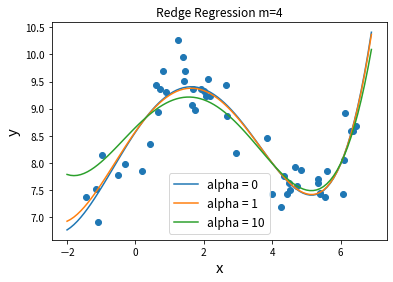

In [56]:
degree = 4
alphalist = [0,1,10]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for alpha in alphalist:
    model = Ridge(alpha=alpha,solver="cholesky") # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("alpha : ",alpha)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("回帰係数ベクトルのノルム : ",np.linalg.norm(model.coef_))
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="alpha = "+str(alpha))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.title("Redge Regression m="+str(degree))
plt.show()

## Lasso回帰

### scikit-learnによるLasso回帰

In [57]:
degree = 4
from sklearn.preprocessing import PolynomialFeatures 

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [58]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_poly,y)

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3969895638884395, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [59]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  8.720786758836816
傾き :  [ 0.64208423 -0.16620376 -0.04314636  0.00827344]
決定係数 :  0.7587326730918746


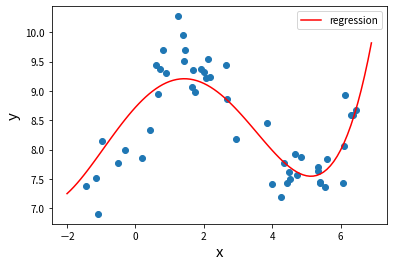

In [60]:
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = model.predict(Xpred_poly) # 予測

plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.plot(Xpred,ypred,c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

### ハイパーパラメータの効果

alpha :  0.001
切片 :  8.74979108485643
傾き :  [ 0.93150135 -0.3288952  -0.01709938  0.00709959]
決定係数 :  0.7964508433943909

alpha :  0.01
切片 :  8.7450301224439
傾き :  [ 0.90524371 -0.31231061 -0.02010743  0.00726427]
決定係数 :  0.797624675394495

alpha :  0.1
切片 :  8.720786758836816
傾き :  [ 0.64208423 -0.16620376 -0.04314636  0.00827344]
決定係数 :  0.7587326730918746

alpha :  1
切片 :  8.855642851212858
傾き :  [ 0.         -0.         -0.02844317  0.00407046]
決定係数 :  0.31005181264220827



C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9101085719469837, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9303456685496103, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3969895638884395, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(


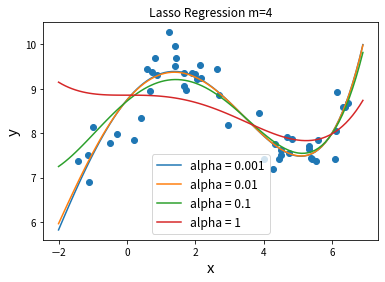

In [61]:
degree = 4
alphalist = [0.001,0.01,0.1,1]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for alpha in alphalist:
    model = Lasso(alpha=alpha) # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("alpha : ",alpha)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="alpha = "+str(alpha))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.title("Lasso Regression m="+str(degree))
plt.show()

## Elastic Net

### scikit-learnによるElastic Net

In [62]:
degree = 4
from sklearn.preprocessing import PolynomialFeatures 

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [63]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1,l1_ratio=0.5) # l1_ratioはパラメータrのこと
model.fit(X_poly,y)

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5290164405469, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1)

In [64]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  8.740940142438433
傾き :  [ 0.70024501 -0.20802764 -0.03514978  0.00782219]
決定係数 :  0.7743179370176889


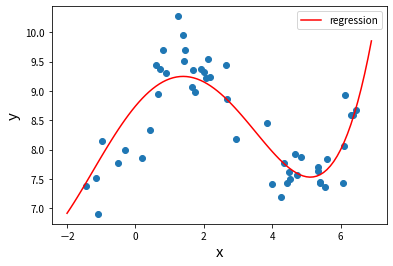

In [65]:
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = model.predict(Xpred_poly) # 予測

plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.plot(Xpred,ypred,c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

### ハイパーパラメータの効果

#### alphaを変化させたとき

alpha :  0
切片 :  8.750385452096701
傾き :  [ 0.93441723 -0.33079316 -0.01674545  0.00707951]
決定係数 :  0.7962557418081162

alpha :  0.1
切片 :  8.740940142438433
傾き :  [ 0.70024501 -0.20802764 -0.03514978  0.00782219]
決定係数 :  0.7743179370176889

alpha :  1
切片 :  8.896116192063175
傾き :  [ 0.         -0.         -0.03360823  0.00491293]
決定係数 :  0.3220254869741327



<ipython-input-66-03469c2fc6e2>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_poly,y)
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9098499221141587, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5290164405469, tolerance: 0.0

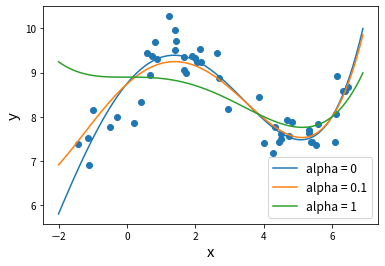

In [66]:
degree = 4
r = 0.5
alphalist = [0,0.1,1]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for alpha in alphalist:
    model = ElasticNet(alpha=alpha,l1_ratio=r) # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("alpha : ",alpha)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="alpha = "+str(alpha))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.show()

### rを変化させたとき

r :  0
切片 :  8.776130517489111
傾き :  [ 0.62118664 -0.19268223 -0.03313989  0.00740406]
決定係数 :  0.750609881900564

r :  0.25
切片 :  8.756020027855335
傾き :  [ 0.57297849 -0.15556294 -0.04056543  0.00784495]
決定係数 :  0.7340056854652561

r :  0.5
切片 :  8.73836531449873
傾き :  [ 0.51421512 -0.11540249 -0.04793629  0.00823932]
決定係数 :  0.7090537751859064

r :  0.75
切片 :  8.722398947094948
傾き :  [ 0.44144246 -0.06975909 -0.05576075  0.00862049]
決定係数 :  0.6716817448256639

r :  1
切片 :  8.708379129168764
傾き :  [ 0.3493224  -0.01613689 -0.06436661  0.00899822]
決定係数 :  0.614695052416331



C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.906555215939916, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9760416266441645, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432531844218857, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packag

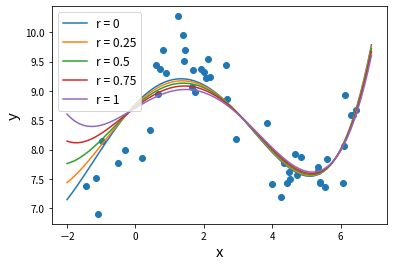

In [67]:
degree = 4
alpha = 0.2
rlist = [0,0.25,0.5,0.75,1]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for r in rlist:
    model = ElasticNet(alpha=alpha,l1_ratio=r) # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("r : ",r)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="r = "+str(r))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.show()